In [3]:
""" github 연동 """
!git clone https://github.com/ku-sungsukim/2025-LGElec-Day2.git ### colab 사용시

fatal: destination path '2025-LGElec-Day2' already exists and is not an empty directory.


## **0. 필요 패키지 불러오기**

In [4]:
""" 데이터 전처리 관련 패키지 """
import numpy as np
import pandas as pd


""" 기계학습 모델 구축 및 평가 패키지 """
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


""" 데이터 시각화 패키지 """
import seaborn as sns
import matplotlib.pyplot as plt


""" 경고 숨기기 """
import warnings
warnings.filterwarnings(action='ignore')

## **1. 데이터 핸들링 및 탐색적 데이터 분석**
 - 분석 데이터: Toyota 중고차 가격 예측

#### **설명변수**
- Id : Record_ID
- Model : Model Description
- Age_08_04 : Age in months as in August 2004
- Mfg_Month : Manufacturing month (1-12)
- Mfg_Year : Manufacturing Year
- KM : Accumulated Kilometers on odometer
- Fuel_Type : Fuel Type (Petrol, Diesel, CNG)
- HP : Horse Power
- Met_Color : Metallic Color (Yes=1, No=0)
- Color : Color (Blue, Red, Grey, Silver, Black, etc.)
- Automatic : Automatic (Yes=1, No=0)
- CC : Cylinder Volume in cubic centimeters
- Doors : Number of doors
- Cylinders : Number of cylinders
- Gears : Number of gear positions
- Quarterly_Tax : Quarterly road tax in EUROs
- Weight : Weight in Kilograms
- Mfr_Guarantee : Within Manufacturer's Guarantee period (Yes=1, No=0)
- BOVAG_Guarantee : BOVAG (Dutch dealer network) Guarantee (Yes=1, No=0)
- Guarantee_Period : Guarantee period in months
- ABS : Anti-Lock Brake System (Yes=1, No=0)
- Airbag_1 : Driver_Airbag (Yes=1, No=0)
- Airbag_2 : Passenger Airbag (Yes=1, No=0)
- Airco : Airconditioning (Yes=1, No=0)
- Automatic_airco : Automatic Airconditioning (Yes=1, No=0)
- Boardcomputer : Boardcomputer (Yes=1, No=0)
- CD_Player : CD Player (Yes=1, No=0)
- Central_Lock : Central Lock (Yes=1, No=0)
- Powered_Windows : Powered Windows (Yes=1, No=0)
- Power_Steering : Power Steering (Yes=1, No=0)
- Radio : Radio (Yes=1, No=0)
- Mistlamps : Mistlamps (Yes=1, No=0)
- Sport_Model : Sport Model (Yes=1, No=0)
- Backseat_Divider : Backseat Divider (Yes=1, No=0)
- Metallic_Rim : Metallic Rim (Yes=1, No=0)
- Radio_cassette : Radio Cassette (Yes=1, No=0)
- Parking_Assistant : Parking assistance system (Yes=1, No=0)
- Tow_Bar : Tow Bar (Yes=1, No=0)

#### **반응변수**
- Price : Offer Price in EUROs

#### **1-1. 데이터 불러오기 및 개요 파악**

In [5]:
""" 데이터 불러오기 """
# data = pd.read_csv('data/ToyotaCorolla.csv') ### 로컬 사용시
data = pd.read_csv('/content/2025-LGElec-Day2/data/ToyotaCorolla.csv') ### colab 사용시

In [8]:
""" 데이터 상위 5개 Row 확인 """
'''Answer'''
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [10]:
""" 데이터 크기 확인 """
data.shape

(1436, 37)

#### **1-2. 탐색적 데이터 분석**

In [15]:
""" 데이터 결측치 여부 및 변수 타입 확인 """
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [12]:
""" 각 변수별 통계량 확인 """
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.260446,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448751,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

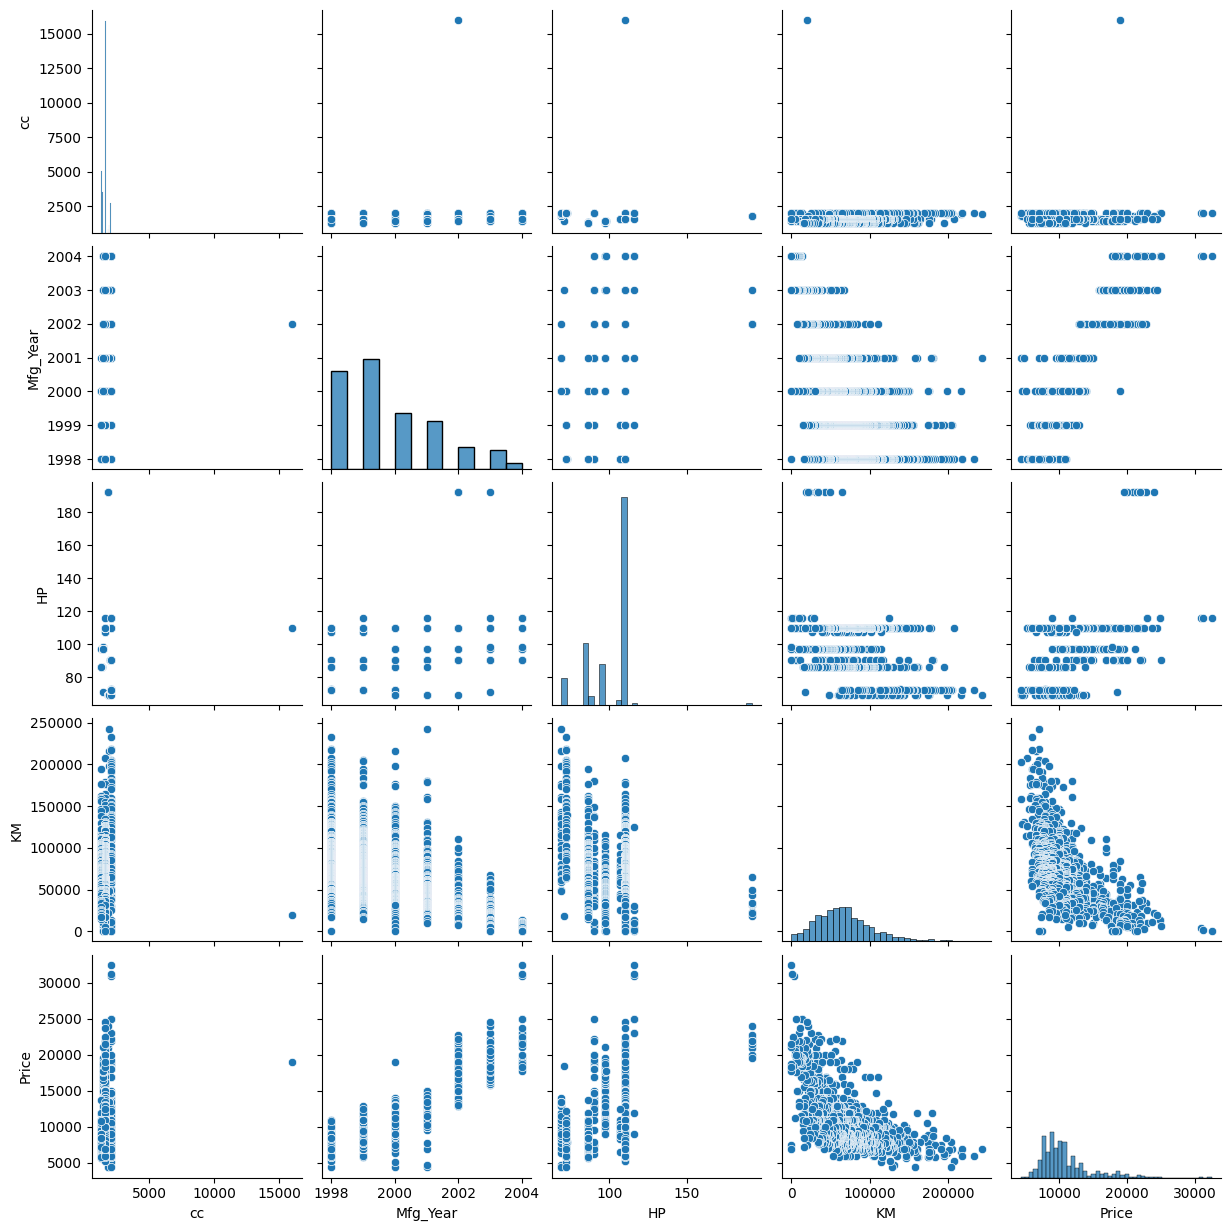

In [16]:
""" pairplot을 통한 각 변수 간 관계성 파악 """

"""
1. cc, Mfg_Year, HP, KM, Price 변수들에 대해서만 시각화
"""

sns.pairplot(data[['cc', 'Mfg_Year', 'HP', 'KM', 'Price']])
#sns.pairplot(data[[]])
plt.show()

In [ ]:
sns.heatmap(
    data.corr(),
    cmap=sns.color_palette("coolwarm", 10), ### 팔레트 색깔 설정
    annot=data.corr() ### 히트맵 내 표시할 값
    )

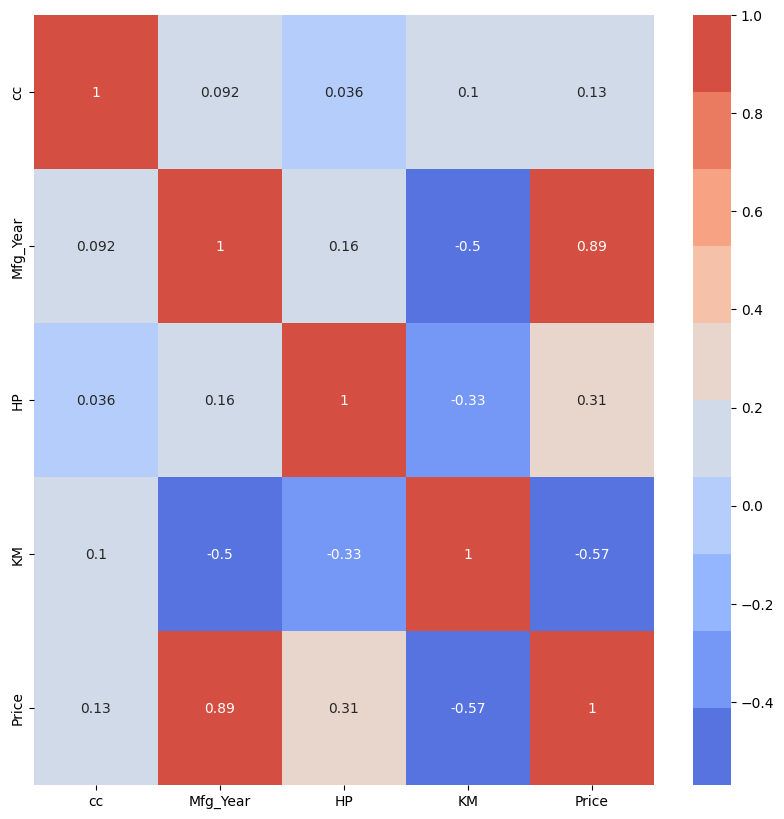

In [20]:
""" 상관관계 히트맵을 통한 변수 간 상관관계 분석 """

"""
1. cc, Mfg_Year, HP, KM, Price 변수들에 대해서만 시각화
2. Figure 크기: 높이 및 너비 모두 10, 10
3. annotation을 상관관계 값으로 표기할 것
4. annotation 폰트 크기: 10
"""

plt.figure(figsize=[10,10])
sns.heatmap(
    data[['cc', 'Mfg_Year', 'HP', 'KM', 'Price']].corr(),
    cmap=sns.color_palette("coolwarm", 10),
    annot=True,
    annot_kws={"size": 10}
    )
plt.show()

## **2. 데이터 분할**

In [23]:
[col for col in data.columns if col not in ['Id', 'Model', 'Fuel_Type']]

['Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'HP',
 'Met_Color',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar']

In [25]:
""" 예측에 필요하지 않은 변수 제거 """

"""
1. 불필요 변수: Id, Model, Fuel_Type
"""
x_cols = [col for col in data.columns if col not in ['Id', 'Model', 'Fuel_Type']]
data = data.drop(columns = ['Id', 'Model', 'Fuel_Type'])
data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,1,1,0,1,0,1,0,0,0


In [26]:
""" 학습데이터와 평가데이터 분할"""

"""
1. X, y변수 구분
  - X: 전체 데이터에서 Price 변수를 제외한 모든 변수
  - Y: Price 변수
2. 학습데이터:평가데이터 = 7:3으로 나눌 것
3. random_state: 216
"""
X = data[[col for col in data.columns if col!='Price']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=216)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1005, 33), (431, 33), (1005,), (431,))

## **3. 모델링**

#### **3-1. 모델 학습 (파라미터 도출)**
 - 이때, statsmodels 패키지를 활용하여 회귀모형을 적합

In [27]:
""" 회귀분석을 위한 상수항 추가 """

"""
1. train 데이터와 test 데이터 모두 추가
"""
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


In [29]:
y_train

,Price
1001,8950
637,7995
876,8750
869,10450
475,8950
...,...
971,10495
709,9450
791,7950
1234,8950


In [30]:
""" 회귀모형 파라미터 도출 """
lm = sm.OLS(y_train, X_train)
lm_trained = lm.fit()

In [ ]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8)) ### 이미지 크기 정의

plt.scatter(y_train, y_train_pred) ### 산점도 그리기 (X, y)
plt.plot([-1, 8], [-1, 8], ls="--", c='red') ### y=x 그래프 그리기

plt.title('Label vs Prediction') ### figure title 정의
plt.xlabel('Label', size=16) ### x축 title 정의
plt.ylabel('Prediction', size=16)

plt.xlim(-1, 8) ### x축 범위
plt.ylim(-1, 8)

plt.show()

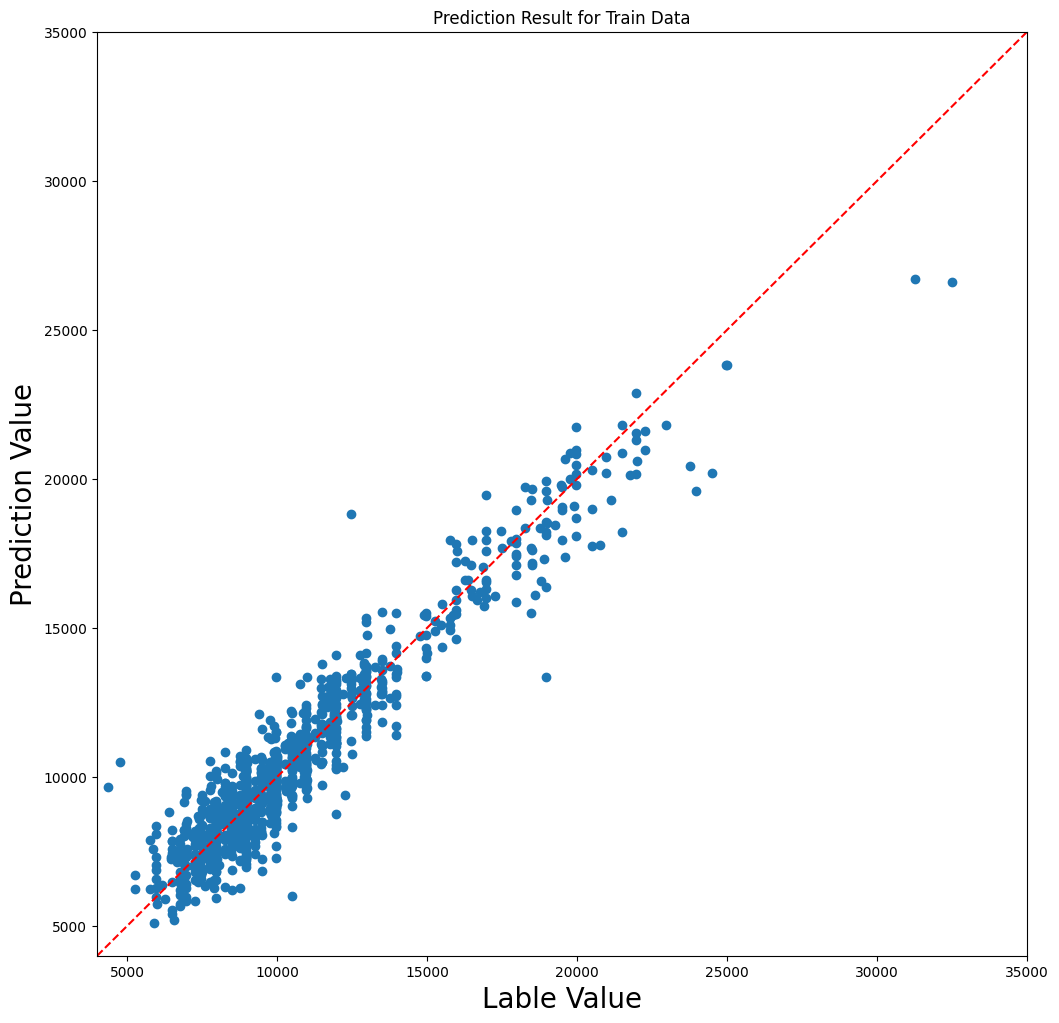

In [31]:
""" train 데이터의 예측 결과 비교 """

"""
1. Figure 크기는 너비 및 높이 모두 12로 지정
 - X축: 실제값
 - Y축: 예측값
2. y=x 그래프를 그릴 것 (범위: [4000, 35000] / 색깔: 빨간색)
3. Figure 제목 및 축 제목 지정
 - Figure 제목: Prediction Result for Train Data
 - X축: Lable Value (폰트크기: 20)
 - Y축: Prediction Value (폰트크기: 20)
4. Figure에 시각화 할 X축 및 Y축 범위를 모두 [4000, 35000]로 지정
"""

y_train_pred = lm_trained.fittedvalues

plt.figure(figsize=[12,12])

plt.scatter(y_train, y_train_pred)
plt.plot([4000, 35000], [4000, 35000], ls="--", c='red')

plt.title('Prediction Result for Train Data')
plt.xlabel('Lable Value', size=20)
plt.ylabel('Prediction Value', size=20)

plt.xlim(4000, 35000)
plt.ylim(4000, 35000)

plt.show()

#### **3-2. 선형회귀 모델의 가정 충족여부 확인**

In [ ]:
""" 오차 값 확인 """
model_residuals = lm_trained.'''Answer'''
model_residuals

In [ ]:
""" 오차의 정규성 확인 """

"""
1. QQ-plot으로 오차의 정규성 분석
 - 이미지 너비 및 높이: 12
 - Figure Title: QQ Plot
 - 표준정규분포선 표시
"""

plt.rcParams['axes.unicode_minus'] = False ### 음수 폰트 깨짐 방지

fig, ax = plt.subplots(1, 1)
fig.set_figheight('''Answer''')
fig.set_figwidth('''Answer''')

sm.ProbPlot(model_residuals).qqplot('''Answer''',
                                    color='#1f77b4',
                                    ax=ax)
ax.title.set_text('''Answer''')

In [ ]:
""" 오차의 등분산성 확인 """

"""
1. residual plot으로 오차의 등분산성 확인
 - 이미지 너비 및 높이: 15
 - 추세선 표시
 - 투명도: 0.3
 - 추세선 색깔: Green
 - Figure 제목: Figure for Residuals and Fitted
 - x축 제목: Fitted values
 - y축 제목: Residuals
"""

model_fitted_y= lm_trained.'''Answer'''

fig, ax = plt.subplots(1, 1)
fig.set_figheight('''Answer''')
fig.set_figwidth('''Answer''')

sns.residplot(x=model_fitted_y,
              y=y_train,
              lowess=True,
              scatter_kws={'''Answer'''},
              line_kws={'''Answer'''},
              ax=ax)
ax.title.set_text('''Answer''')
ax.set(xlabel='''Answer''', ylabel='''Answer''')

#### **3-3. 모델 평가 및 결과해석**

In [ ]:
""" 모델 결과 해석 """
print(lm_trained.'''Answer''')

In [ ]:
""" 모델 1차 성능 평가 (train data) """

"""
1. 평가척도: MSE, RMSE, MAE, MAPE, R2
"""

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true).reshape(-1), np.array(y_pred).reshape(-1)
    return '''Answer'''

train_pred = lm_trained.'''Answer'''

print('Training MSE: {:.3f}'.format('''Answer'''))
print('Training RMSE: {:.3f}'.format('''Answer'''))
print('Training MAE: {:.3f}'.format('''Answer'''))
print('Training MAPE: {:.3f}'.format('''Answer'''))
print('Training R2: {:.3f}'.format('''Answer'''))

In [ ]:
""" 모델 1차 성능 평가 (test data) """

"""
1. 평가척도: MSE, RMSE, MAE, MAPE, R2
"""

test_pred = lm_trained.'''Answer'''

print('Testing MSE: {:.3f}'.format('''Answer'''))
print('Testing RMSE: {:.3f}'.format('''Answer'''))
print('Testing MAE: {:.3f}'.format('''Answer'''))
print('Testing MAPE: {:.3f}'.format('''Answer'''))
print('Testing R2: {:.3f}'.format('''Answer'''))

In [ ]:
""" 유의미하지 않은 변수 제거 후, 다시 모델링 """

"""
1. 유의수준 기준: 0.05
"""

""" 유의미하지 않은 변수들 식별 """
not_significants = '''Answer'''
# not_significants = lm_trained.pvalues.index[lm_trained.pvalues > 0.05] ### solution2: 눈으로 일일이 식별하지 않고 쉽게 제거 가능
print(f'유의미하지 않은 변수들: {not_significants}')

""" 유의미하지 않은 변수들 제거 """
X_train_new = X_train.'''Answer'''
X_test_new = X_test.'''Answer'''

In [ ]:
""" 변수 제거 후, 모델 학습 결과 다시 확인 """
lm_new = sm.OLS('''Answer''')
lm_new_trained = '''Answer'''
print(lm_new_trained.'''Answer''')

In [ ]:
""" 모델 2차 성능 평가 (train data) """

"""
1. 평가척도: MSE, RMSE, MAE, MAPE, R2
"""

train_pred_new = lm_new_trained.'''Answer'''

print('Training MSE: {:.3f}'.format('''Answer'''))
print('Training RMSE: {:.3f}'.format('''Answer'''))
print('Training MAE: {:.3f}'.format('''Answer'''))
print('Training MAPE: {:.3f}'.format('''Answer'''))
print('Training R2: {:.3f}'.format('''Answer'''))

In [ ]:
""" 모델 2차 성능 평가 (test data) """

"""
1. 평가척도: MSE, RMSE, MAE, MAPE, R2
"""

test_pred_new = lm_new_trained.'''Answer'''

print('Testing MSE: {:.3f}'.format('''Answer'''))
print('Testing RMSE: {:.3f}'.format('''Answer'''))
print('Testing MAE: {:.3f}'.format('''Answer'''))
print('Testing MAPE: {:.3f}'.format('''Answer'''))
print('Testing R2: {:.3f}'.format('''Answer'''))

## **Appendix. sklearn을 활용한 선형회귀모형 구축**

In [ ]:
""" sklearn으로 모델 학습 및 예측 """

"""
1. sklearn의 LinearRegression함수 활용하여 예측값까지 산출
 - 모델 내 상수항은 활용하지 않을 것
"""

lr_skl = '''Answer'''
lr_skl.'''Answer'''
y_pred_skl = lr_skl.'''Answer'''


In [ ]:
""" sklearn을 통한 회귀계수 확인"""
lr_skl.'''Answer'''

In [ ]:
""" sklearn 예측 결과 확인 """

"""
1. 평가척도: MSE, RMSE, MAE, MAPE, R2
"""

test_mse_skl = '''Answer'''
test_rmse_skl = '''Answer'''
test_mae_skl = '''Answer'''
test_mape_skl = '''Answer'''
test_r2_skl = '''Answer'''

print('sklearn Testing MSE: {:.3f}'.format(test_mse_skl))
print('sklearn Testing RMSE: {:.3f}'.format(test_rmse_skl))
print('sklearn Testing MAE: {:.3f}'.format(test_mae_skl))
print('sklearn Testing MAPE: {:.3f}'.format(test_mape_skl))
print('sklearn Testing R2: {:.3f}'.format(test_r2_skl))